# Chlorophyll parameterization

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import json
import seaborn as sns

In [29]:
test_set = [
'step_101_chromophore_10', 'step_151_chromophore_02', 'step_251_chromophore_09', 'step_151_chromophore_16', 'step_351_chromophore_09',
'step_301_chromophore_22', 'step_51_chromophore_19', 'step_351_chromophore_15', 'step_351_chromophore_21', 'step_501_chromophore_18',
'step_1_chromophore_21', 'step_301_chromophore_02', 'step_301_chromophore_05', 'step_451_chromophore_22', 'step_251_chromophore_06',
'step_251_chromophore_02', 'step_101_chromophore_04', 'step_1_chromophore_10', 'step_351_chromophore_13', 'step_51_chromophore_18',
'step_1_chromophore_26', 'step_251_chromophore_21', 'step_351_chromophore_05', 'step_101_chromophore_26', 'step_101_chromophore_02',
'step_151_chromophore_04', 'step_451_chromophore_27', 'step_301_chromophore_03', 'step_201_chromophore_01', 'step_351_chromophore_04',
'step_451_chromophore_14', 'step_101_chromophore_08', 'step_301_chromophore_24', 'step_301_chromophore_10', 'step_201_chromophore_26',
'step_101_chromophore_05', 'step_301_chromophore_04', 'step_401_chromophore_05', 'step_51_chromophore_10', 'step_101_chromophore_22',
'step_451_chromophore_26', 'step_451_chromophore_09', 'step_101_chromophore_15', 'step_201_chromophore_14', 'step_151_chromophore_09',
'step_451_chromophore_15', 'step_151_chromophore_25', 'step_501_chromophore_23', 'step_201_chromophore_25', 'step_101_chromophore_17',
'step_351_chromophore_01', 'step_351_chromophore_17', 'step_301_chromophore_20', 'step_401_chromophore_09', 'step_501_chromophore_14',
'step_401_chromophore_11', 'step_451_chromophore_01', 'step_51_chromophore_26', 'step_1_chromophore_22', 'step_51_chromophore_21',
'step_201_chromophore_05', 'step_1_chromophore_01', 'step_451_chromophore_03', 'step_201_chromophore_27', 'step_101_chromophore_12',
'step_351_chromophore_03', 'step_1_chromophore_03', 'step_301_chromophore_19', 'step_501_chromophore_20', 'step_501_chromophore_06',
'step_101_chromophore_25', 'step_451_chromophore_07', 'step_101_chromophore_11', 'step_301_chromophore_17', 'step_301_chromophore_27',
'step_201_chromophore_21', 'step_501_chromophore_17', 'step_401_chromophore_17', 'step_101_chromophore_20', 'step_501_chromophore_10',
'step_301_chromophore_11', 'step_151_chromophore_22', 'step_151_chromophore_05', 'step_151_chromophore_14', 'step_151_chromophore_24',
'step_51_chromophore_04', 'step_201_chromophore_10', 'step_1_chromophore_05', 'step_51_chromophore_16', 'step_451_chromophore_06',
'step_51_chromophore_22', 'step_401_chromophore_20', 'step_351_chromophore_10', 'step_251_chromophore_17', 'step_351_chromophore_25',
'step_251_chromophore_19', 'step_301_chromophore_15', 'step_101_chromophore_14', 'step_1_chromophore_25', 'step_101_chromophore_09'
]

In [2]:
def read_results(file_name : str):
    data = open(file_name)
    data = json.load(data)

    df = pd.DataFrame.from_dict(data).T
    df = df.astype({
        "tddft_energy" : float,
        "xtb_energy" : float,
        "energy_error" : float,
        "dipole_error" : float,
    })
    
    return df
    
def read_parameters():
    return

In [3]:
df = read_results("validate_2021_1_28_1629.json")
df

,tddft_energy,xtb_energy,energy_error,tddft_dipole,xtb_dipole,dipole_error
step_1_chromophore_01,0.067717,0.046135,0.021582,"[0.305422706, -2.699393089, 0.410750669]","[0.49954817681503333, -4.341006201457196, 0.32...",4.305619
step_1_chromophore_03,0.069472,0.049482,0.019990,"[0.108963122, -2.698943706, -0.009963017]","[0.20185121641497922, -3.9107879137977157, 0.3...",4.998186
step_1_chromophore_05,0.068697,0.048504,0.020193,"[-2.513556266, -0.533737752, -0.412950881]","[-3.579394893339135, -0.5182324686857972, -0.6...",3.948966
step_1_chromophore_10,0.069634,0.045300,0.024334,"[-2.223931978, -1.457271636, 0.133906067]","[1.7210763059396919, 1.1518631662945125, -0.11...",0.696390
step_1_chromophore_21,0.068427,0.045987,0.022440,"[-2.370489918, 1.339153662, -0.274851245]","[-0.36392619767522494, 0.15805550688713121, 0....",10.647962
...,...,...,...,...,...,...
step_51_chromophore_18,0.067460,0.048892,0.018568,"[0.911409223, -2.468323674, 0.705702998]","[-1.383281515591714, 3.546996889457861, -0.568...",6.603448
step_51_chromophore_19,0.068516,0.048772,0.019744,"[2.438641034, -1.102950292, -0.366831588]","[-3.7933285634769702, 1.7517545613776657, 0.18...",5.336395
step_51_chromophore_21,0.067183,0.046424,0.020759,"[2.341241721, -1.304410169, 0.394577021]","[-3.5378374944733753, 1.9840151718631414, -0.3...",3.789839
step_51_chromophore_22,0.067402,0.045931,0.021471,"[-2.726270284, -0.432155392, 0.47175026]","[-4.109243004270607, -0.5601259561475904, 0.65...",1.458379


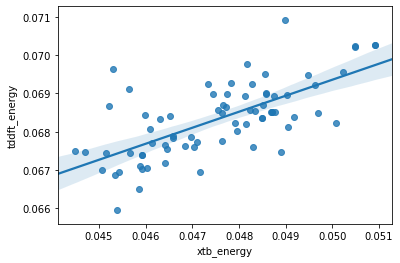

In [4]:
sns.regplot(df["xtb_energy"], df["tddft_energy"])

In [5]:
df = read_results("validate_2021_1_29_1217.json")
df["tddft_energy"] = df["tddft_energy"].apply(lambda x : x * 27.2114)
df["xtb_energy"] = df["xtb_energy"].apply(lambda x : x * 27.2114)
df["energy_error"] = df["energy_error"].apply(lambda x : x * 27.2114)

df

,tddft_energy,xtb_energy,energy_error,tddft_dipole,xtb_dipole,dipole_error
step_1_chromophore_01,1.842674,1.803192,0.039482,"[0.305422706, -2.699393089, 0.410750669]","[0.4643018593485546, -4.221465530540823, 0.602...",0.552274
step_1_chromophore_02,1.896226,1.890860,0.005367,"[-2.43839633, 0.294525704, -0.899224337]","[3.322149831479109, -1.0281857635071299, 1.385...",9.761843
step_1_chromophore_03,1.890430,1.893395,-0.002965,"[0.108963122, -2.698943706, -0.009963017]","[0.25891349713663075, -3.9796316156484695, 0.7...",11.285224
step_1_chromophore_04,1.813340,1.767527,0.045814,"[-1.617948358, 2.206090372, -0.104797396]","[2.1460918010988443, -3.2248383222246355, -0.8...",14.326370
step_1_chromophore_05,1.869342,1.845028,0.024313,"[-2.513556266, -0.533737752, -0.412950881]","[-2.7637649362297796, -0.22690501127101406, -0...",7.802915
...,...,...,...,...,...,...
step_51_chromophore_23,1.872416,1.882996,-0.010580,"[1.061763358, 2.479452932, -0.612198776]","[-1.3251911960062932, -4.060055195744615, 0.87...",5.139426
step_51_chromophore_24,1.857042,1.890665,-0.033623,"[2.662292271, 0.23516316, 0.734897695]","[-4.198234089410431, -0.39063050498124535, -0....",2.395850
step_51_chromophore_25,1.877178,1.885713,-0.008535,"[-1.222060096, -2.298360273, 0.157114112]","[-1.490321962430329, -2.562890678335332, -0.26...",8.772851
step_51_chromophore_26,1.912200,1.952604,-0.040404,"[-1.63288215, 1.98782286, -0.152232915]","[-0.05806016950323312, 0.12662241862217252, -0...",16.335760


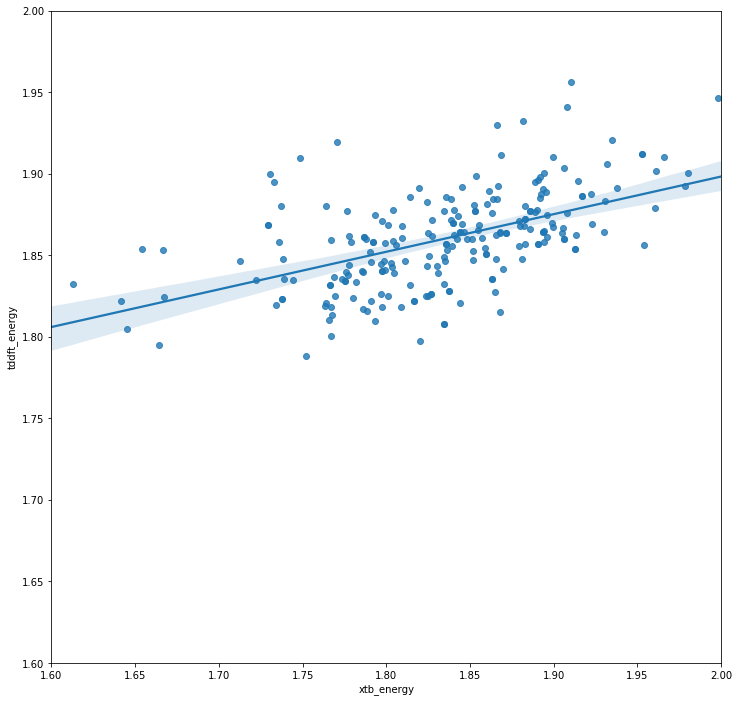

In [6]:
fig, ax = plt.subplots()
ax=sns.regplot(df["xtb_energy"], df["tddft_energy"])
plt.xlim(1.6, 2)
plt.ylim(1.6, 2)
fig.set_size_inches(12, 12)

Text(0.5, 0, 'energy error / eV')

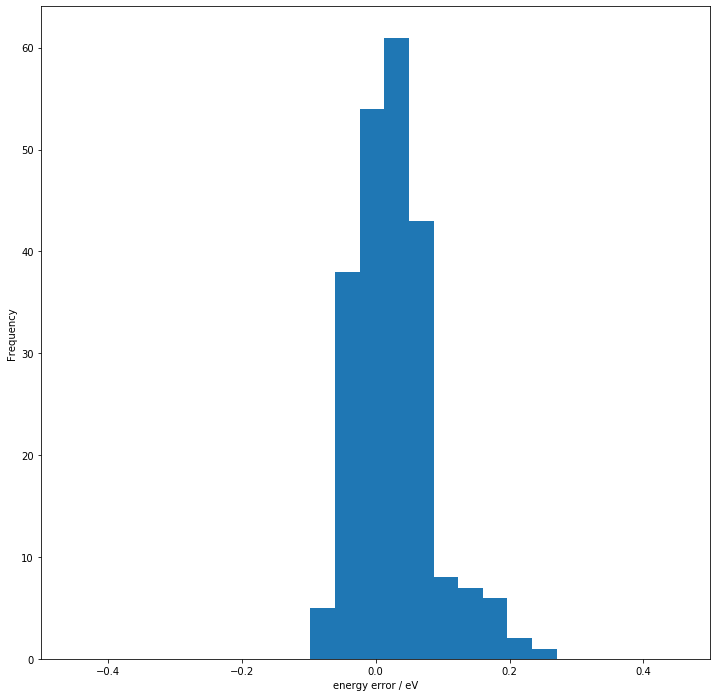

In [7]:
fig, ax = plt.subplots()
df["energy_error"].plot.hist(ax=ax)
fig.set_size_inches(12, 12)
plt.xlim(-.5, .5)
plt.xlabel("energy error / eV")

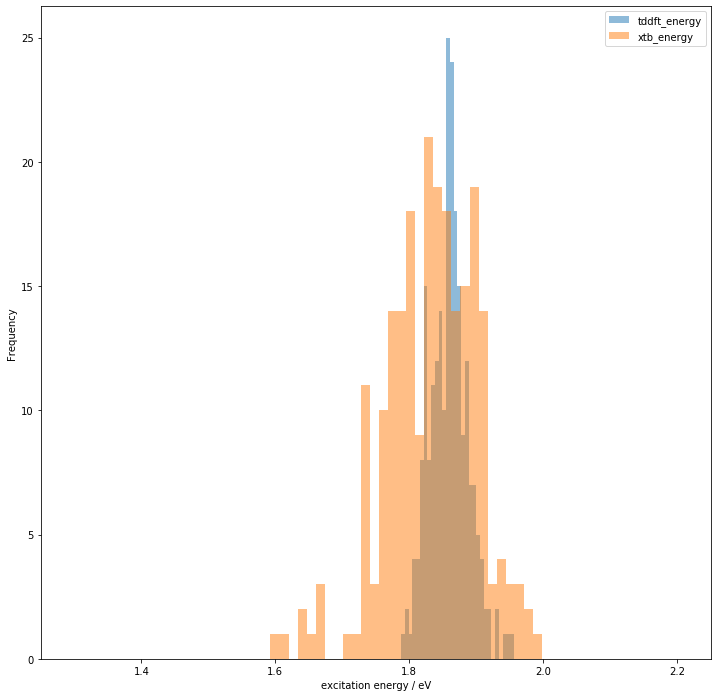

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
df["tddft_energy"].plot.hist(ax=ax, alpha=0.5, bins=30)
df["xtb_energy"].plot.hist(ax=ax, alpha=0.5,  bins=30)
plt.xlim(1.25, 2.25)
plt.xlabel("excitation energy / eV")
plt.legend()

## self-interaction

In [9]:
df =  read_results("validate_2021_2_1_1540.json")
df = df.astype({"self_interaction" : float})

df

,tddft_energy,xtb_energy,energy_error,tddft_dipole,xtb_dipole,dipole_error,self_interaction
step_1_chromophore_01,0.067717,0.066266,0.001451,"[0.305422706, -2.699393089, 0.410750669]","[0.4643018593485546, -4.221465530540823, 0.602...",0.552274,0.012446
step_1_chromophore_02,0.069685,0.069488,0.000197,"[-2.43839633, 0.294525704, -0.899224337]","[3.322149831479109, -1.0281857635071299, 1.385...",9.761843,0.010212
step_1_chromophore_03,0.069472,0.069581,-0.000109,"[0.108963122, -2.698943706, -0.009963017]","[0.25891349713663075, -3.9796316156484695, 0.7...",11.285224,0.012372
step_1_chromophore_04,0.066639,0.064955,0.001684,"[-1.617948358, 2.206090372, -0.104797396]","[2.1460918010988443, -3.2248383222246355, -0.8...",14.326370,0.012044
step_1_chromophore_05,0.068697,0.067804,0.000893,"[-2.513556266, -0.533737752, -0.412950881]","[-2.7637649362297796, -0.22690501127101406, -0...",7.802915,0.005513
...,...,...,...,...,...,...,...
step_51_chromophore_23,0.068810,0.069199,-0.000389,"[1.061763358, 2.479452932, -0.612198776]","[-1.3251911960062932, -4.060055195744615, 0.87...",5.139426,0.012618
step_51_chromophore_24,0.068245,0.069481,-0.001236,"[2.662292271, 0.23516316, 0.734897695]","[-4.198234089410431, -0.39063050498124535, -0....",2.395850,0.013142
step_51_chromophore_25,0.068985,0.069299,-0.000314,"[-1.222060096, -2.298360273, 0.157114112]","[-1.490321962430329, -2.562890678335332, -0.26...",8.772851,0.006640
step_51_chromophore_26,0.070272,0.071757,-0.001485,"[-1.63288215, 1.98782286, -0.152232915]","[-0.05806016950323312, 0.12662241862217252, -0...",16.335760,0.000022


Text(0, 0.5, 'excitation energy error / hartree')

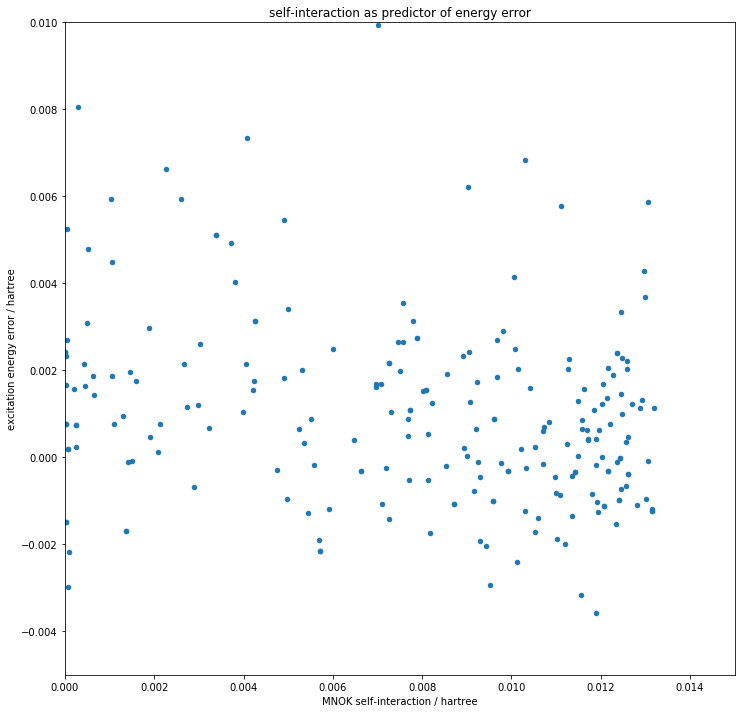

In [10]:
fig, ax = plt.subplots()
df.plot.scatter("self_interaction", "energy_error", ax=ax)
ax.set_xlim(0, 0.015)
ax.set_ylim(-0.005, 0.01)
fig.set_size_inches(12, 12)
plt.title("self-interaction as predictor of energy error")
plt.xlabel("MNOK self-interaction / hartree")
plt.ylabel("excitation energy error / hartree")

In [11]:
df =  read_results("validate_2021_2_1_170.json")
df = df.astype({"coloumb" : float,
                "exchange" : float}
)

df

,tddft_energy,xtb_energy,energy_error,tddft_dipole,xtb_dipole,dipole_error,coloumb,exchange
step_1_chromophore_01,0.067717,0.066266,0.001451,"[0.305422706, -2.699393089, 0.410750669]","[0.4643018593485546, -4.221465530540823, 0.602...",0.552274,0.012446,0.036080
step_1_chromophore_02,0.069685,0.069488,0.000197,"[-2.43839633, 0.294525704, -0.899224337]","[3.322149831479109, -1.0281857635071299, 1.385...",9.761843,0.010212,0.030281
step_1_chromophore_03,0.069472,0.069581,-0.000109,"[0.108963122, -2.698943706, -0.009963017]","[0.25891349713663075, -3.9796316156484695, 0.7...",11.285224,0.012372,0.037466
step_1_chromophore_04,0.066639,0.064955,0.001684,"[-1.617948358, 2.206090372, -0.104797396]","[2.1460918010988443, -3.2248383222246355, -0.8...",14.326370,0.012044,0.036994
step_1_chromophore_05,0.068697,0.067804,0.000893,"[-2.513556266, -0.533737752, -0.412950881]","[-2.7637649362297796, -0.22690501127101406, -0...",7.802915,0.005513,0.016194
...,...,...,...,...,...,...,...,...
step_51_chromophore_23,0.068810,0.069199,-0.000389,"[1.061763358, 2.479452932, -0.612198776]","[-1.3251911960062932, -4.060055195744615, 0.87...",5.139426,0.012618,0.036481
step_51_chromophore_24,0.068245,0.069481,-0.001236,"[2.662292271, 0.23516316, 0.734897695]","[-4.198234089410431, -0.39063050498124535, -0....",2.395850,0.013142,0.038404
step_51_chromophore_25,0.068985,0.069299,-0.000314,"[-1.222060096, -2.298360273, 0.157114112]","[-1.490321962430329, -2.562890678335332, -0.26...",8.772851,0.006640,0.019749
step_51_chromophore_26,0.070272,0.071757,-0.001485,"[-1.63288215, 1.98782286, -0.152232915]","[-0.05806016950323312, 0.12662241862217252, -0...",16.335760,0.000022,0.000102


Text(0, 0.5, 'excitation energy error / hartree')

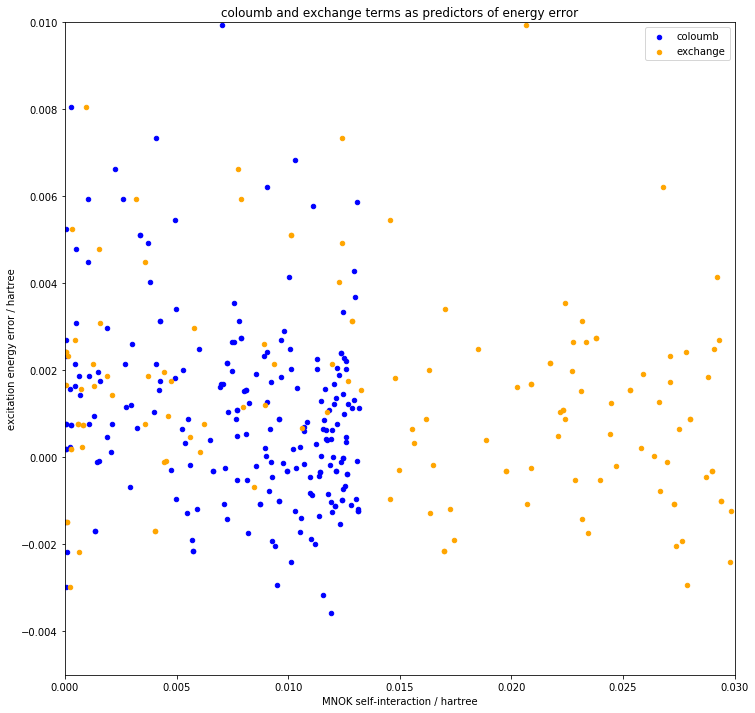

In [12]:
fig, ax = plt.subplots()
df.plot.scatter("coloumb", "energy_error", ax=ax, color='blue', label='coloumb')
df.plot.scatter("exchange", "energy_error", ax=ax, color='orange', label='exchange')
ax.set_xlim(0, 0.03)
ax.set_ylim(-0.005, 0.01)

fig.set_size_inches(12, 12)
plt.legend()
plt.title("coloumb and exchange terms as predictors of energy error")
plt.xlabel("MNOK self-interaction / hartree")
plt.ylabel("excitation energy error / hartree")

## optimize with exchange and coloumb

In [13]:
df = read_results("validate_2021_2_2_916.json")
df["tddft_energy"] = df["tddft_energy"].apply(lambda x : x * 27.2114)
df["xtb_energy"] = df["xtb_energy"].apply(lambda x : x * 27.2114)
df["energy_error"] = df["energy_error"].apply(lambda x : x * 27.2114)
df

,tddft_energy,xtb_energy,energy_error,tddft_dipole,xtb_dipole,dipole_error,coloumb,exchange
step_1_chromophore_01,1.842674,1.855885,-0.013210,"[0.305422706, -2.699393089, 0.410750669]","[-0.1968416405745505, 0.6480488558143326, -0.0...",11.380285,0.000262456,0.000821866
step_1_chromophore_02,1.896226,1.907143,-0.010916,"[-2.43839633, 0.294525704, -0.899224337]","[0.06548130503195629, 0.44792131191120504, 0.0...",84.907993,0.000195483,0.00107038
step_1_chromophore_03,1.890430,1.829342,0.061088,"[0.108963122, -2.698943706, -0.009963017]","[0.16830080126502914, -0.06475760021940713, -0...",72.817039,1.62881e-05,0.000122246
step_1_chromophore_04,1.813340,1.816448,-0.003108,"[-1.617948358, 2.206090372, -0.104797396]","[0.05249954739832244, 0.23913298804472716, 0.0...",51.549601,3.01876e-05,0.000158861
step_1_chromophore_05,1.869342,1.755344,0.113997,"[-2.513556266, -0.533737752, -0.412950881]","[0.4055053547624576, 0.10837881010875455, 0.12...",7.507117,0.000131751,0.000501914
...,...,...,...,...,...,...,...,...
step_51_chromophore_23,1.872416,1.918006,-0.045590,"[1.061763358, 2.479452932, -0.612198776]","[0.09980864461774197, -0.25161363982750795, 0....",44.160243,3.91655e-05,0.000153518
step_51_chromophore_24,1.857042,1.885852,-0.028810,"[2.662292271, 0.23516316, 0.734897695]","[-0.0630899679659427, -0.07611677419781901, 0....",74.068782,9.34087e-06,4.90058e-05
step_51_chromophore_25,1.877178,1.904151,-0.026972,"[-1.222060096, -2.298360273, 0.157114112]","[0.4353960636262163, 0.5304581712071958, 0.196...",22.426775,0.000407177,0.00134802
step_51_chromophore_26,1.912200,1.864651,0.047549,"[-1.63288215, 1.98782286, -0.152232915]","[-0.24340755292853042, 0.13378818010027885, -0...",33.234173,9.27549e-05,0.000464744


(1.6, 2)

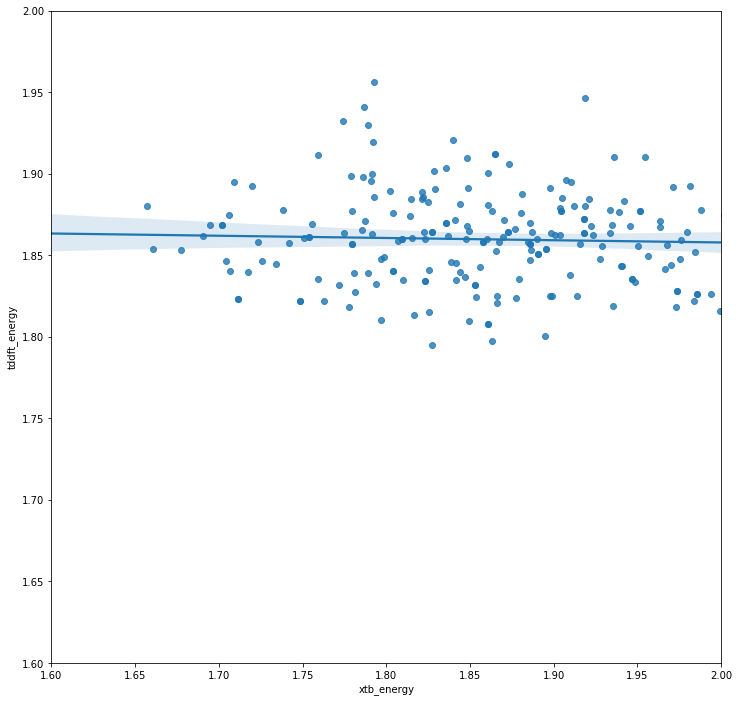

In [14]:
fig, ax = plt.subplots()
ax=sns.regplot(df["xtb_energy"], df["tddft_energy"])
fig.set_size_inches(12, 12)
plt.xlim(1.6, 2)
plt.ylim(1.6, 2)

## Mg and N huckel parameters

In [67]:
df = read_results("validate_2021_2_7_180.json")
df["tddft_energy"] = df["tddft_energy"].apply(lambda x : x * 27.2114)
df["xtb_energy"] = df["xtb_energy"].apply(lambda x : x * 27.2114)
df["energy_error"] = df["energy_error"].apply(lambda x : x * 27.2114)
df

,tddft_energy,xtb_energy,energy_error,tddft_dipole,xtb_dipole,dipole_error
step_1_chromophore_01,1.842674,1.813490,0.029185,"[0.305422706, -2.699393089, 0.410750669]","[0.440527442203954, -4.403864397327928, 0.5050...",2.214334
step_1_chromophore_02,1.896226,1.913104,-0.016878,"[-2.43839633, 0.294525704, -0.899224337]","[-3.681485761265278, 1.077756228196413, -1.557...",9.017453
step_1_chromophore_03,1.890430,1.861686,0.028745,"[0.108963122, -2.698943706, -0.009963017]","[-0.205151885137968, 4.213559648718387, -0.627...",8.689596
step_1_chromophore_04,1.813340,1.784202,0.029139,"[-1.617948358, 2.206090372, -0.104797396]","[2.3437437647253607, -3.4533591648179267, -0.4...",9.133152
step_1_chromophore_05,1.869342,1.879574,-0.010232,"[-2.513556266, -0.533737752, -0.412950881]","[-3.701500280751384, -0.4788050345693342, -0.7...",4.905866
...,...,...,...,...,...,...
step_51_chromophore_23,1.872416,1.871787,0.000629,"[1.061763358, 2.479452932, -0.612198776]","[-1.6132292444175758, -4.033516890523781, 1.02...",1.432337
step_51_chromophore_24,1.857042,1.882633,-0.025591,"[2.662292271, 0.23516316, 0.734897695]","[4.268453094911529, 0.3999400925658909, 0.8224...",4.524605
step_51_chromophore_25,1.877178,1.910720,-0.033542,"[-1.222060096, -2.298360273, 0.157114112]","[-1.6863498757164432, -2.998220914397218, -0.2...",7.445597
step_51_chromophore_26,1.912200,1.963764,-0.051564,"[-1.63288215, 1.98782286, -0.152232915]","[-0.21358069658620069, 0.3924612673769993, -0....",10.954284


In [68]:
slope1, intercept1, r_value1, p_value1, std_err1 = scipy.stats.linregress(df["xtb_energy"], df["tddft_energy"])

full set pearson r value = 0.424
225
validation set pearson r value = 0.410
150


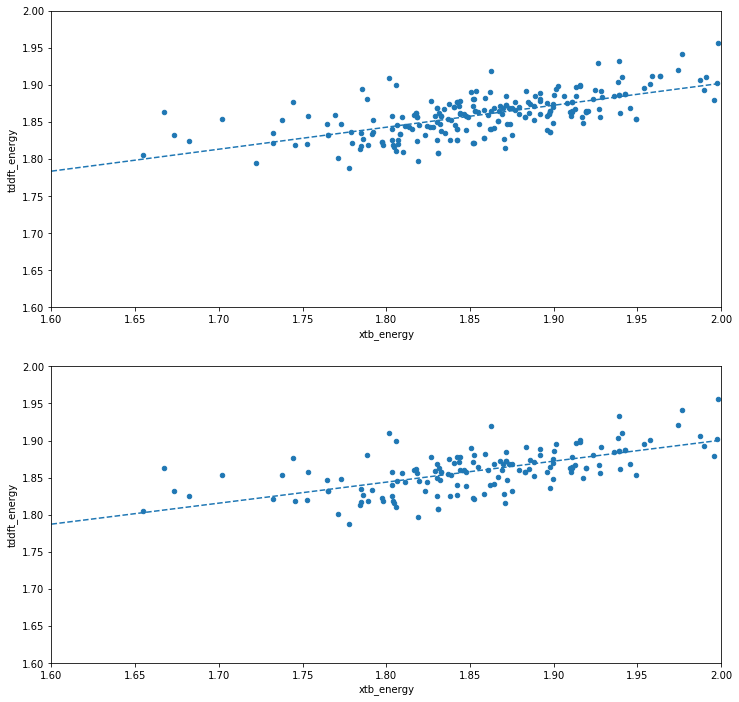

In [72]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(12, 12)
ax1.set_xlim(1.6, 2)
ax1.set_ylim(1.6, 2)
ax2.set_xlim(1.6, 2)
ax2.set_ylim(1.6, 2)

df.plot.scatter("xtb_energy", "tddft_energy", ax=ax1)
x_vals = np.array(ax1.get_xlim())
y_vals = intercept1 + slope1 * x_vals
ax1.plot(x_vals, y_vals, '--')

print("full set pearson r value = %.3f" % r_value1 ** 2)
print(len(df.index))


validation_set = df

for i in test_set:
    if i in validation_set.index:
        validation_set = validation_set.drop(i)

slope2, intercept2, r_value2, p_value2, std_err2 = scipy.stats.linregress(validation_set["xtb_energy"], validation_set["tddft_energy"])
        
validation_set.plot.scatter("xtb_energy", "tddft_energy", ax=ax2)
x_vals = np.array(ax2.get_xlim())
y_vals = intercept2 + slope2 * x_vals
ax2.plot(x_vals, y_vals, '--')


print("validation set pearson r value = %.3f" % r_value2 ** 2)
print(len(validation_set.index))



